# Linear Model

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the data file 
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
# Checking the data to find out if there is a missing data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:ylabel='sales'>

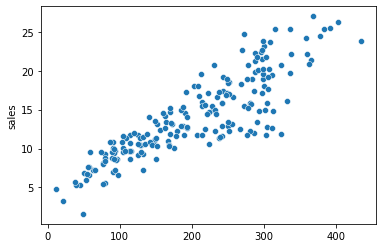

In [6]:
sns.scatterplot(data=df , x=(df['TV']+df['radio']+df['newspaper']), y = 'sales')

In [7]:
# Divide the data to a part for Training the Model & a second part to test the performance of the model
from sklearn.model_selection import train_test_split 

In [8]:
X=df.drop('sales',axis=1)
y=df['sales']

In [9]:
X_train,X_test , y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [10]:
# importing the Linear Model 

In [11]:
from sklearn.linear_model import LinearRegression 

In [12]:
model = LinearRegression()

In [13]:
# training the model according to the Training data

In [14]:
model.fit(X_train,y_train)

LinearRegression()

In [15]:
# the model is ready for Testing 

In [16]:
pred = model.predict(X_test)

In [17]:
# Import the performance measuring software tools

In [18]:
from sklearn.metrics import mean_squared_error , mean_absolute_error 

In [19]:
mean_squared_error(y_test,pred)

2.298716697886378

In [20]:
np.sqrt(mean_squared_error(y_test,pred))

1.5161519375993877

In [21]:
mean_absolute_error(y_test,pred)

1.2137457736144808

In [22]:
df['sales'].mean()

14.022500000000003

In [23]:
1.51615 /14.00225 

0.10827902658501314

In [24]:
# the error is about 10 percent according to Root Mean Squared Error

In [25]:
1.21374 /14.00225 

0.08668178328482923

In [26]:
# the error is about 8 percent according to  Mean Absolute Error

In [27]:
# now by changing the polynomal degree 

In [28]:
from sklearn.preprocessing import PolynomialFeatures

In [29]:
poly_converter = PolynomialFeatures(include_bias=False)
# possible to give a spesific value for the ploynomial degree 

In [30]:
polynomial_featured =poly_converter.fit_transform(X)

In [31]:
X.shape

(200, 3)

In [32]:
polynomial_featured.shape

(200, 9)

In [33]:
pX_train,pX_test , y_train,y_test = train_test_split(polynomial_featured,y,test_size=0.3,random_state=101)

In [34]:
with_poly_model = LinearRegression()

In [35]:
with_poly_model.fit(pX_train,y_train)

LinearRegression()

In [36]:
pred2 = with_poly_model.predict(pX_test)

In [37]:
np.sqrt(mean_squared_error(y_test,pred2))

0.6646431757269196

In [38]:
# With polynomial the Root Mean Squared Error reduced from 1.51 to 0.66

In [39]:
mean_absolute_error(y_test,pred2)

0.48967980448037

In [40]:
# With polynomial the Mean Absolute Error reduced from 1.21 to 0.48

In [41]:
# the performance of PolynomialFeatures can be changed by changing the degree and to figure it out a for loop can be used 

In [42]:
rmse = []
mae=[]
for n in range(1,10):
    model = LinearRegression()
    poly_converter = PolynomialFeatures(include_bias=False,degree=n)
    polynomial_featured =poly_converter.fit_transform(X)
    fpX_train,fpX_test , y_train,y_test = train_test_split(polynomial_featured,y,test_size=0.3,random_state=101)
    model.fit(fpX_train,y_train)
    pred3 = model.predict(fpX_test)
    r = np.sqrt(mean_squared_error(y_test,pred3))
    a =mean_absolute_error(y_test,pred3)
    
    rmse.append(r)
    mae.append(a)

In [43]:
# by ploting the results to see the best polynomial degree 

In [44]:
rmse

[1.5161519375993873,
 0.6646431757269196,
 0.5803286825231453,
 0.5077742624232109,
 2.5758247603435955,
 4.490868529265006,
 1381.404235838588,
 4449.5681972303655,
 95893.0265813161]

In [45]:
rmse.index(min(rmse))

3

In [46]:
# the lowest polynomial degree is the index of lowest value + 1 (as index start fom zero)
# the best polynomial degree is 4 

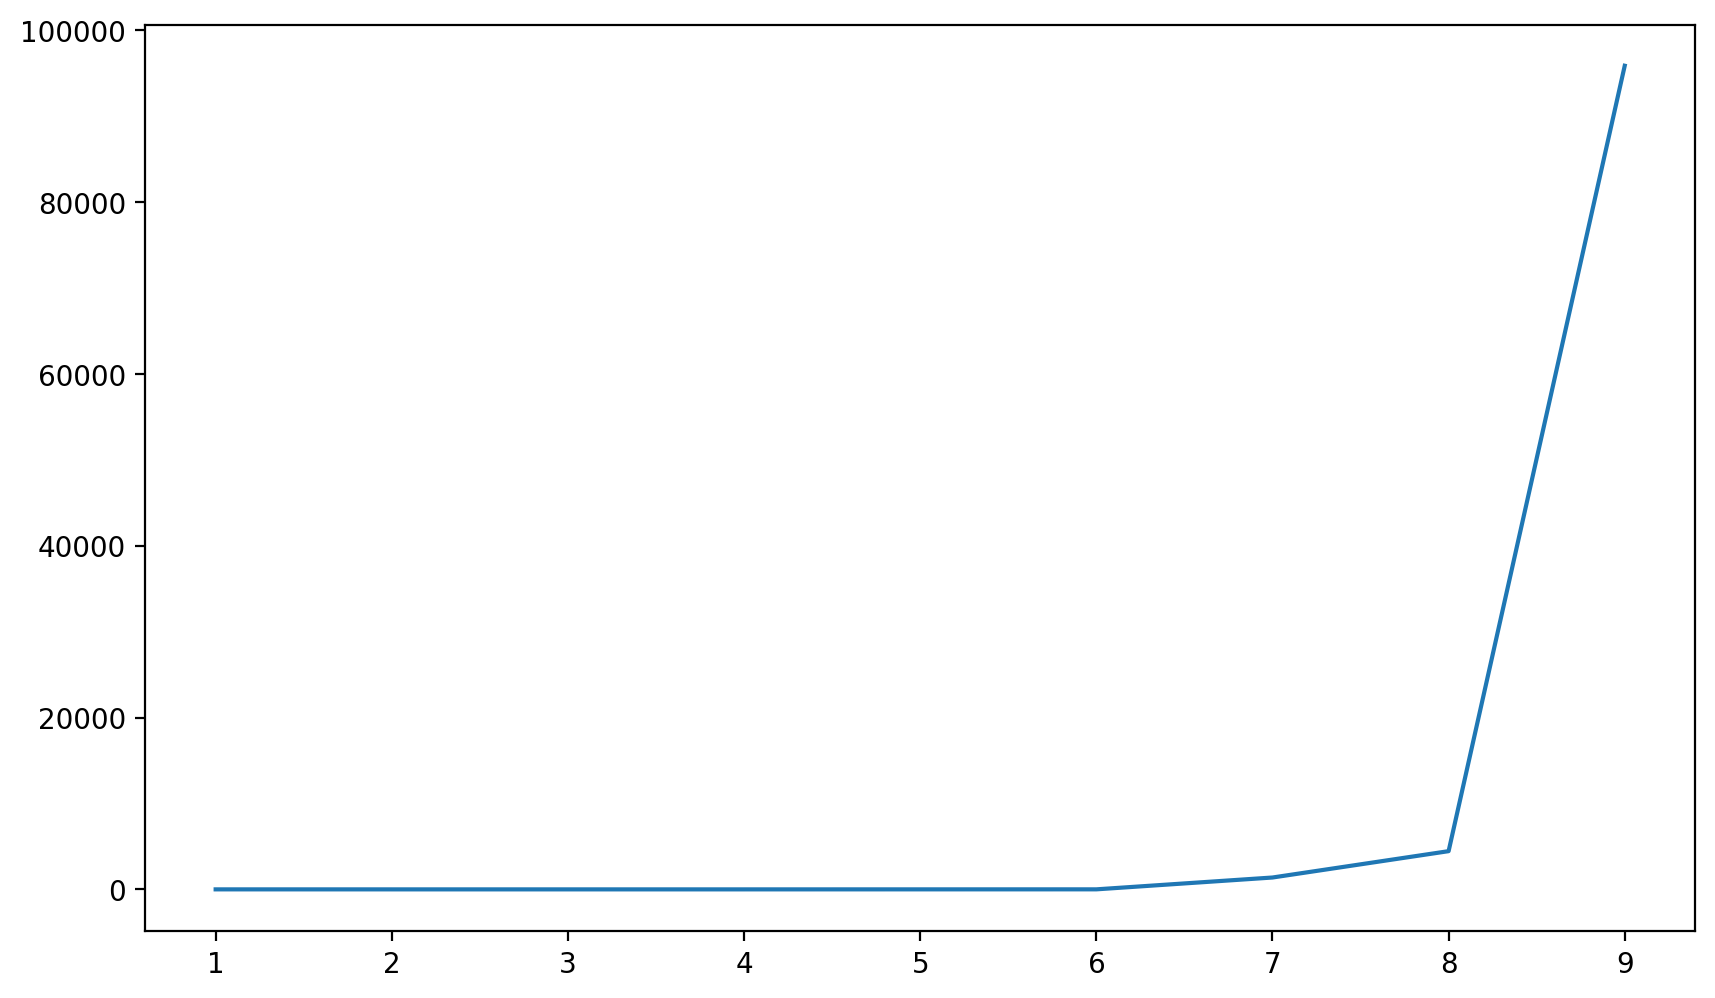

In [47]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,10),rmse)

In [48]:
mae.index(min(mae))

3

In [49]:
#the same as before >>>>>>>>>>>  the lowest polynomial degree is the index of lowest value + 1 (as index start fom zero)
# the best polynomial degree is 4 

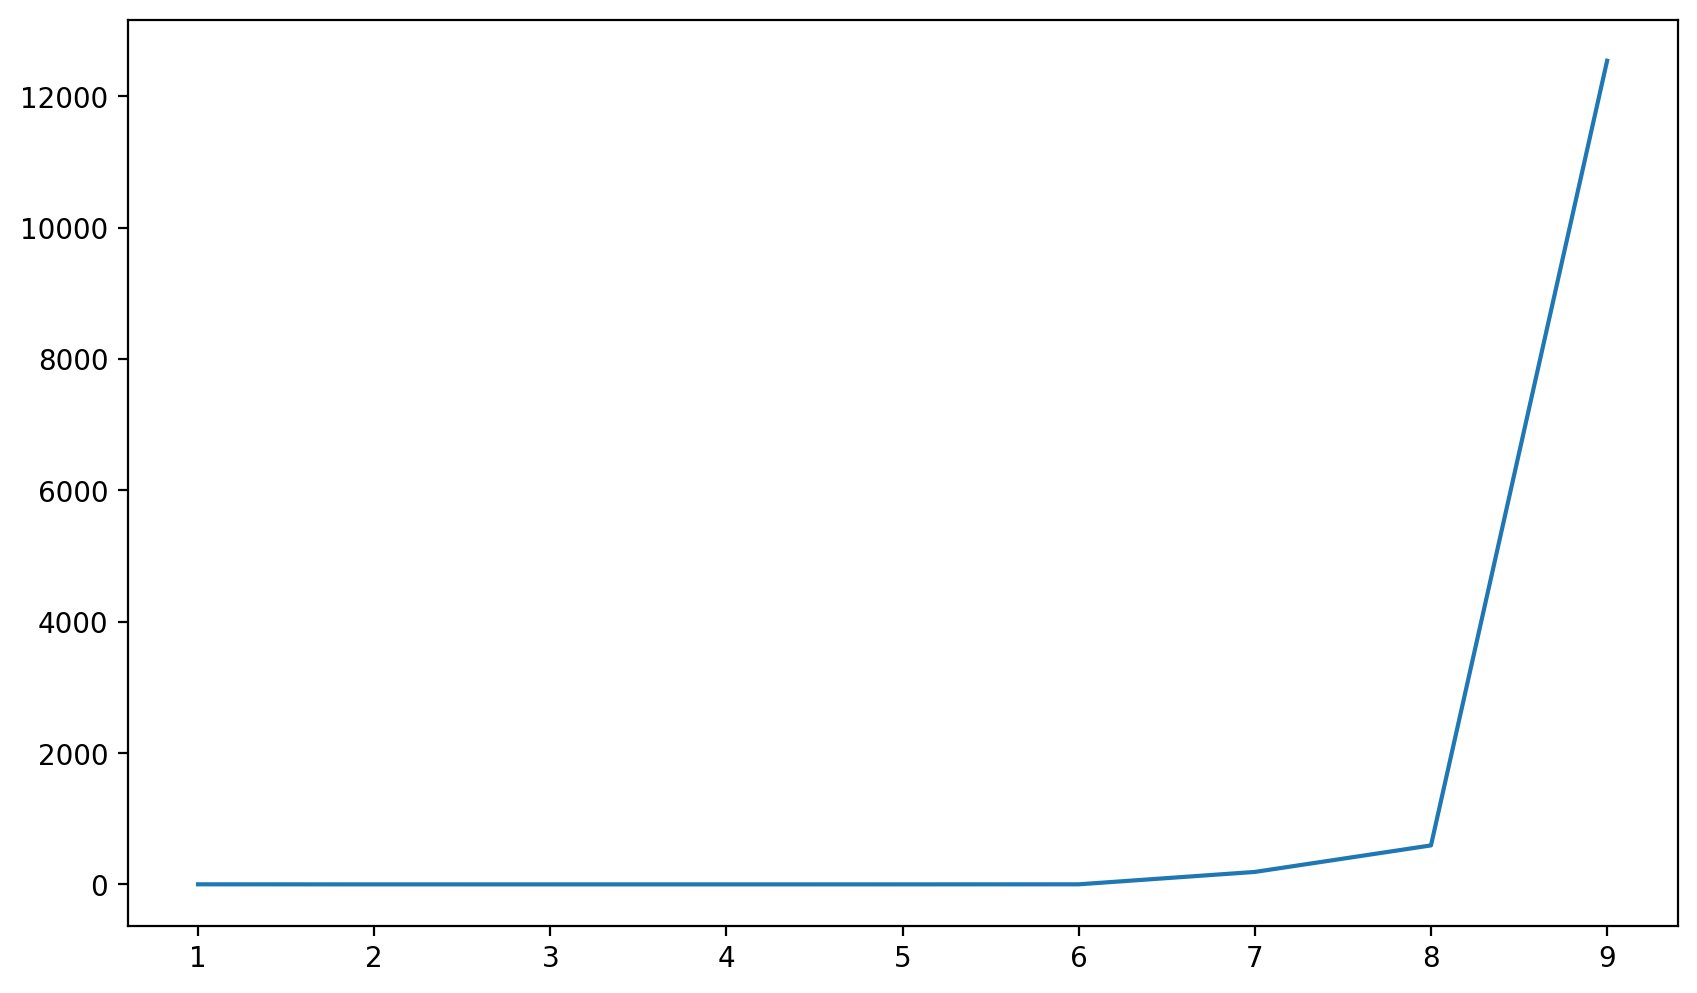

In [50]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,10),mae)

In [51]:
# for better result 1 - polynoial , 2- cross validation 101  3 - scaling 